In [2]:
using PastaQ

## 1-qubit and 2-qubit gate generator

In [3]:
function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

## random circuit and running circuit generator

In [4]:
function run(N, depth)
    # Random circuit.
    gates = Vector{Tuple}[]

    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
    end

    psi = runcircuit(N, gates)
end

run (generic function with 1 method)

## Choose depth and width and execute circuit

In [5]:
N = 4                           # Number of qubits
depth = 4                       # Depth of random circuit
nshots = 1024                   # Number of measurements
gates = run(N, depth) # Build gates

ITensors.MPS
[1] IndexSet{2} (dim=2|id=445|"Qubit,Site,n=1") (dim=2|id=132|"Link,fact")
[2] IndexSet{3} (dim=2|id=132|"Link,fact") (dim=2|id=36|"Qubit,Site,n=2") (dim=4|id=160|"Link,fact")
[3] IndexSet{3} (dim=2|id=467|"Qubit,Site,n=3") (dim=4|id=160|"Link,fact") (dim=2|id=497|"Link,fact")
[4] IndexSet{2} (dim=2|id=497|"Link,fact") (dim=2|id=579|"Qubit,Site,n=4")


In [6]:
data= getsamples(gates, nshots, local_basis = ["Z"])

1024×4 Matrix{Pair{String, Int64}}:
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>0
    ⋮                    
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0

In [7]:
#function getValues(Pair)
#    return Pair[2]
#end

In [12]:
M = [x[2] for x in data]

1024×4 Matrix{Int64}:
 0  0  1  0
 0  1  1  0
 0  0  1  1
 1  1  1  0
 0  0  1  1
 0  1  0  0
 1  1  1  0
 0  0  1  1
 0  1  1  0
 0  1  1  0
 1  1  1  1
 0  0  1  1
 1  0  1  0
 ⋮        
 0  1  1  0
 0  0  1  1
 0  1  0  0
 0  0  1  1
 0  1  1  0
 0  1  1  0
 1  1  1  0
 0  1  0  0
 0  0  1  0
 1  1  1  0
 0  1  1  0
 1  1  1  0

In [13]:
#M = getValues.(data)

In [14]:
A = zeros(Int64, nshots)

1024-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

## Binary to Decimal

In [15]:
for i in 1:nshots
    for j in 1:N
        A[i] += 2^(j-1)*M[i,j]
    end
end

In [16]:
A

1024-element Vector{Int64}:
  4
  6
 12
  7
 12
  2
  7
 12
  6
  6
 15
 12
  5
  ⋮
  6
 12
  2
 12
  6
  6
  7
  2
  4
  7
  6
  7

In [17]:
Pr = zeros(Int,2^N)

16-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

# Collect samve value

In [18]:
for i in 1:nshots
    Pr[A[i] + 1] += 1
end

In [19]:
Pr

16-element Vector{Int64}:
  43
   6
  52
  13
  50
  11
 373
 132
  16
   2
  33
  22
 189
   8
  58
  16

In [20]:
idx=0

0

### Check result

In [21]:
for i in 1:2^N
    idx += Pr[i]
end

In [22]:
idx

1024

In [23]:
Pr_1 = zeros(2^N)

16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

### Collection to Prob

In [24]:
for i in 1:2^N
    Pr_1[i]=Pr[i]/idx
end

In [25]:
Pr_1

16-element Vector{Float64}:
 0.0419921875
 0.005859375
 0.05078125
 0.0126953125
 0.048828125
 0.0107421875
 0.3642578125
 0.12890625
 0.015625
 0.001953125
 0.0322265625
 0.021484375
 0.1845703125
 0.0078125
 0.056640625
 0.015625

In [26]:
idx_1=0
for i in 1:2^N
    idx_1 += Pr_1[i]
end

In [27]:
idx_1

1.0

In [28]:
using PyPlot

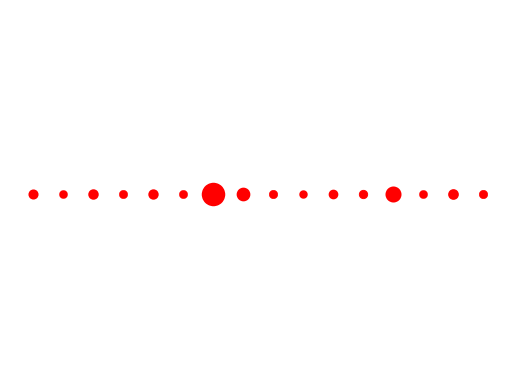

(0.25, 16.75, -0.05500000000000001, 0.05500000000000001)

In [29]:
for i in 1:2^N
    scatter(i,0,color="red",linewidth=30.0*Pr_1[i])
end
axis("off")